In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [6]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex'>

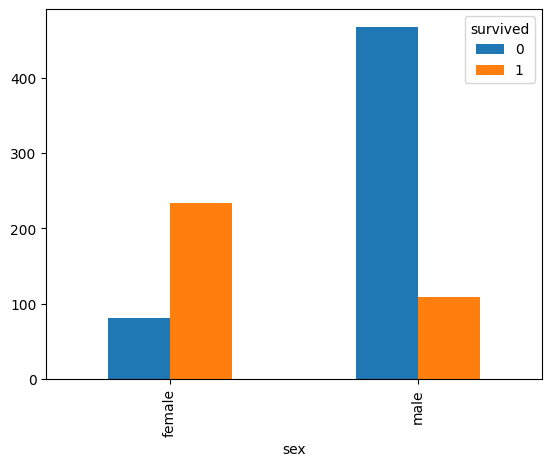

In [7]:
pd.crosstab(df.sex, df.survived).plot(kind='bar')

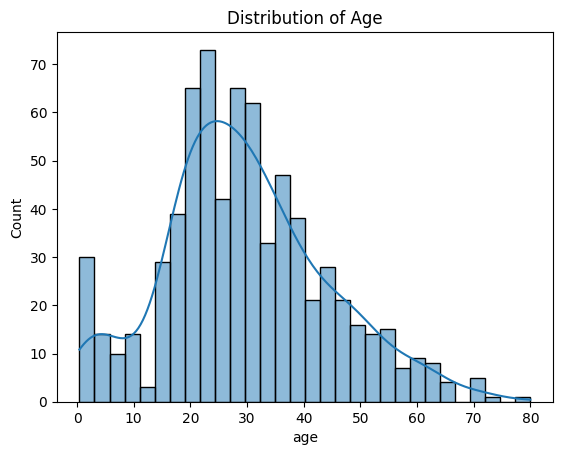

In [8]:
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()


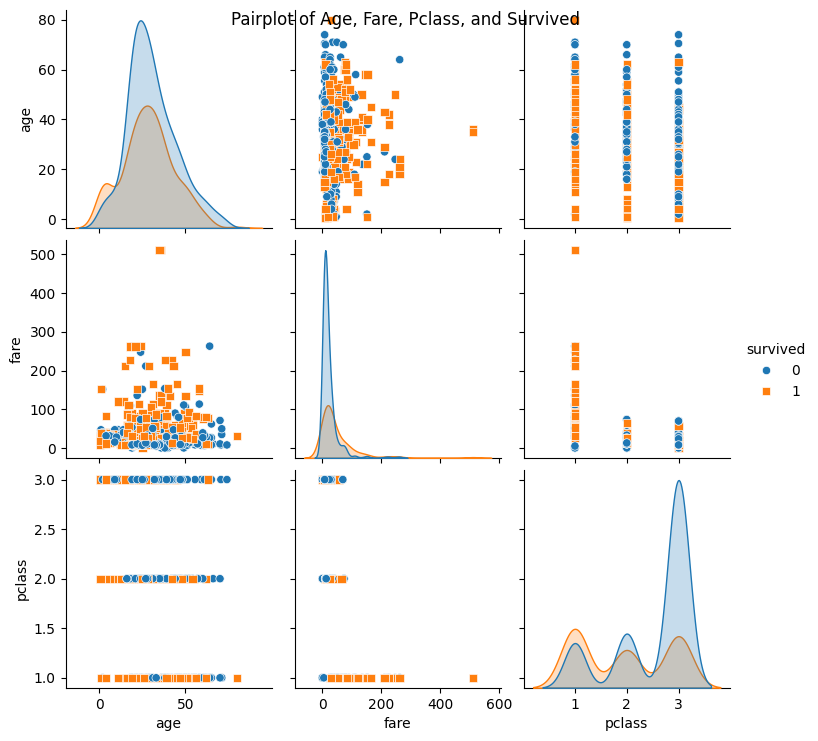

In [9]:
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue='survived', markers=['o', 's'], diag_kind='kde')
plt.suptitle('Pairplot of Age, Fare, Pclass, and Survived')
plt.show()


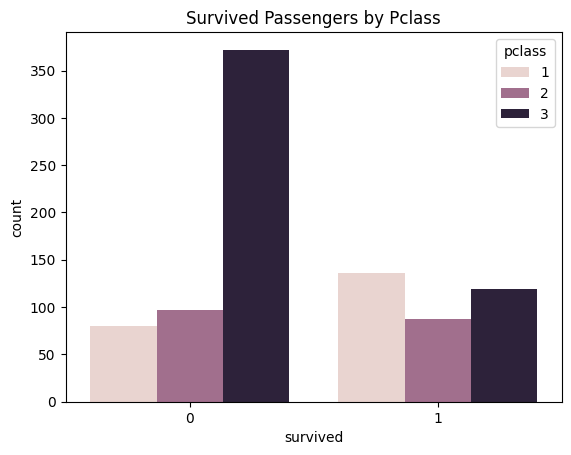

In [10]:
sns.countplot(x='survived', hue='pclass', data=df)
plt.title('Survived Passengers by Pclass')
plt.show()


<Axes: xlabel='age'>

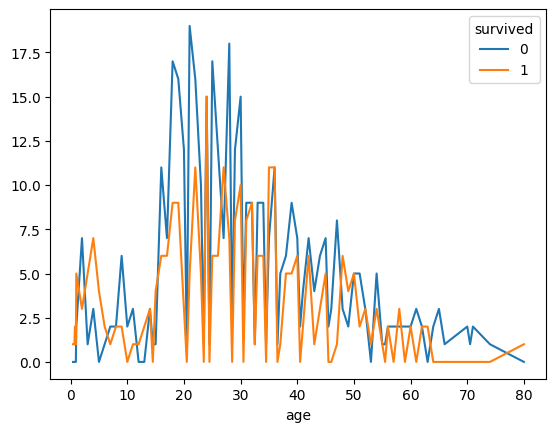

In [11]:
pd.crosstab(df.age, df.survived).plot(kind='line')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
df.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

In [15]:
df.embarked.unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [17]:

df.drop('deck', axis=1, inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [18]:
X = df.drop('survived', axis=1)
y = df['survived']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train, y_train)

c:\Users\Policeman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[108   0]
 [  0  71]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        71

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Precision Score:  1.0


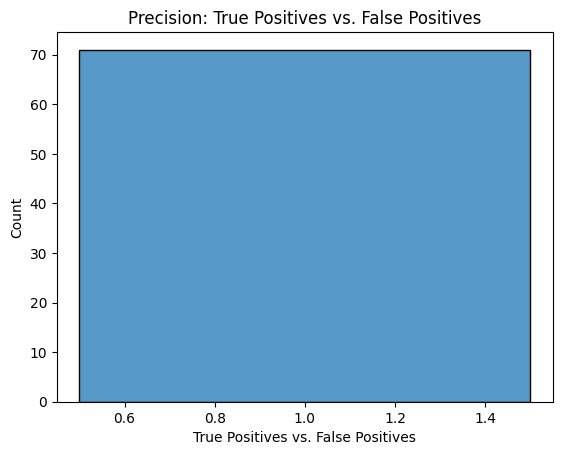

In [30]:
print('Precision Score: ', precision_score(y_test, y_pred))
sns.histplot(y_pred[y_pred == 1] == y_test[y_pred == 1], kde=False)
plt.title('Precision: True Positives vs. False Positives')
plt.xlabel('True Positives vs. False Positives')
plt.show()

F1 Score:  1.0


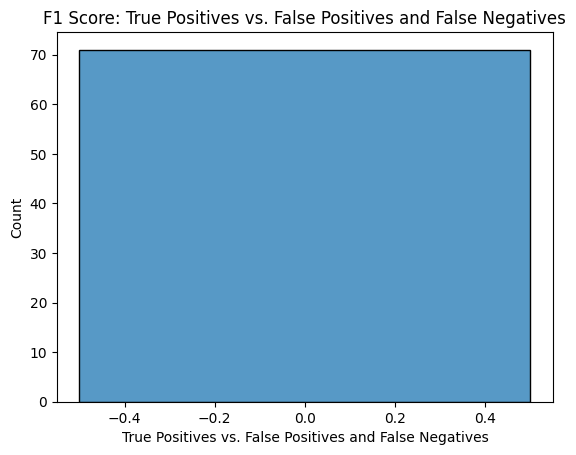

In [31]:
print('F1 Score: ', f1_score(y_test, y_pred))
sns.histplot((2 * y_pred[y_test == 1] == y_test[y_test == 1]) | (2 * y_pred[y_pred == 1] == y_test[y_pred == 1]), kde=False)
plt.title('F1 Score: True Positives vs. False Positives and False Negatives')
plt.xlabel('True Positives vs. False Positives and False Negatives')
plt.show()

Recall Score:  1.0


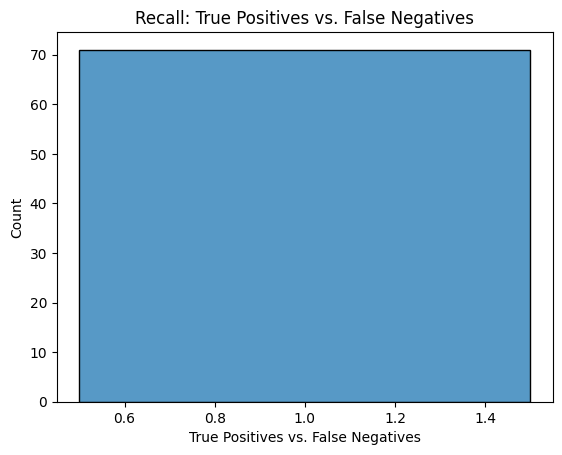

In [34]:
print('Recall Score: ', recall_score(y_test, y_pred))
sns.histplot(y_pred[y_test == 1] == y_test[y_test == 1], kde=False)
plt.title('Recall: True Positives vs. False Negatives')
plt.xlabel('True Positives vs. False Negatives')
plt.show()

Accuracy Score:  1.0


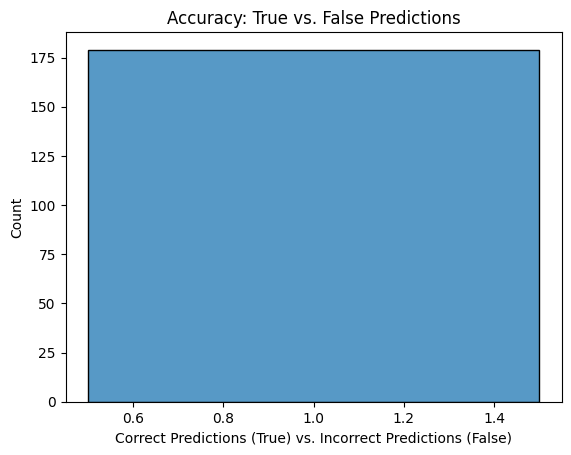

In [35]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
sns.histplot(y_pred == y_test, kde=False)
plt.title('Accuracy: True vs. False Predictions')
plt.xlabel('Correct Predictions (True) vs. Incorrect Predictions (False)')
plt.show()

In [32]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        71

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(70.72222222222221, 0.5, 'Actual')

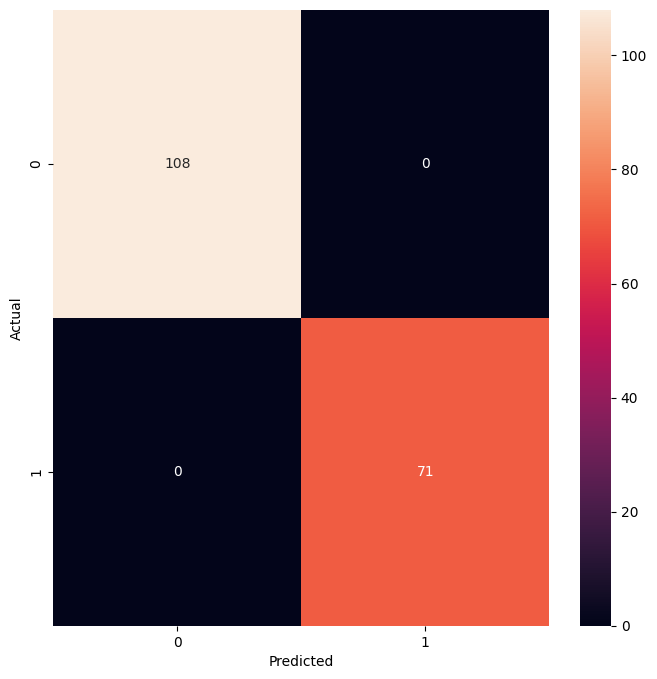

In [26]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')